In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

A.  Generate 500 realizations of x 

In [2]:
def gaussian_sample(mean, variance, count):
    return np.random.normal(mean, variance**0.5, count)

def gaussian(x, mu, var):
    return np.exp(-1.0*(x-mu)**2/(2.0*var)) / np.sqrt(2.0*np.pi*var)


B.  Use EM algo 

In [3]:
def generate_points():
    component_1 = gaussian_sample(5, 1, 250)
    component_2 = gaussian_sample(-5, 1, 250)
    rawdata = np.concatenate([component_1, component_2])

    # set up dataframe (half are randomly assigned to gauss 1)
    #  i.e. probabilities start off = 0.5
    cols = "value gaussian".split()
    data = pd.DataFrame(rawdata, columns=['value'])
    data['pi1'] = 0
    data['pi2'] = 0
    
    for idx, row in data.iterrows():
        p = np.random.random()
        data.iloc[idx, data.columns.get_loc('pi1')] = p    
        data.iloc[idx, data.columns.get_loc('pi2')] = 1-p    

    return data

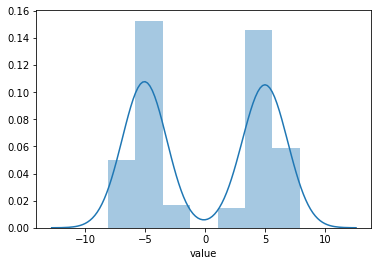

In [4]:
data = generate_points()
sns.distplot(data.value)

In [14]:
def update_parameters(data):
    
    # get mean     
    numer1 = numer2 = denom1 = denom2 = 0
    
    
    for index, row in data.iterrows():
        p1 = row.pi1
        p2 = row.pi2
        
        numer1 += row.value * p1 
        denom1 += p1
        numer2 += row.value * p2
        denom2 += p2 

    mu1 = numer1/denom1
    mu2 = numer2/denom2

    
    # get variance
    numer1 = numer2 = denom1 = denom2 = 0

    for index, row in data.iterrows():
        p1 = row.pi1
        p2 = row.pi2

        numer1 += p1 * (row.value-mu1)**2
        denom1 += p1    
        numer2 += p2 * (row.value-mu2)**2
        denom2 += p2

    sigma1 = numer1/denom1
    sigma2 = numer2/denom2
    
    return mu1, sigma1, mu2, sigma2

def update_weight(data):
    x = np.sum(data.pi1)
    return x/len(data)
    

In [15]:
# E step : REASSIGN LABELS 

def do_probability_thing(data, mu1, mu2, var1, var2, w):

    for index, row in data.iterrows():
        val = row.value
        pi1 = gaussian(val, mu1, var1) * w
        pi2 = gaussian(val, mu2, var2) * (1-w)

        p1i = (pi1) / (pi1 + pi2)
        p2i = (pi2) / (pi1 + pi2)
      
#         print(pi1, pi2, p1i, p2i)
        
        data.iloc[index, data.columns.get_loc('pi1')] = p1i    
        data.iloc[index, data.columns.get_loc('pi2')] = p2i    
        
    
    return data
        

In [24]:
data = generate_points()

for i in range(10):
    mu1, var1, mu2, var2 = update_parameters(data)
    w = update_weight(data)
    data = do_probability_thing(data, mu1, mu2, var1, var2, w)


mu1, var1, mu2, var2, w

(0.10181859077526743,
 25.621988475982274,
 -0.05464341674319681,
 25.619082375098472,
 0.4949518219158438)

In [17]:
data

,value,pi1,pi2
0,6.399994,0.470371,0.529629
1,3.386197,0.481502,0.518498
2,7.014535,0.468103,0.531897
3,4.907938,0.475880,0.524120
4,7.464802,0.466441,0.533559
5,6.525017,0.469909,0.530091
6,5.603665,0.473311,0.526689
7,3.783928,0.480033,0.519967
8,5.284168,0.474491,0.525509
9,4.538604,0.477245,0.522755


In [9]:
update_weight(data)

0.4994598341153569

In [10]:
np.mean(data.p1i)

AttributeError: 'DataFrame' object has no attribute 'p1i'

In [ ]:
class point:
	def __init__(self, x, actual):
		self.x = x
		_p = np.random.random()
		self.p = [None, _p, 1-_p]
		self.actual = actual

	def __str__(self):
		return str(self.x)+" "+str(self.p[1])+" "+str(self.p[2])

def generatePoints(u1, s1, u2, s2, numPoints):
	points = []
	num1 = num2 = 0
	for i in range(numPoints):
		if np.random.random()<.5:
			points.append(point(np.random.normal(u1,s1), 1))
			num1+=1
		else:
			points.append(point(np.random.normal(u2,s2), 2))
			num2+=1
	return points, num1, num2

In [ ]:
p, n1, n2 = generatePoints(5, 1, -5, 1, 100)

In [ ]:
for i in range(100):
    print(p[i])